# Proyecto: Predicción de entregas a tiempo

# Importacion de librerias

In [ ]:
# ==========================================
# PROYECTO: PREDICCIÓN DE ENTREGAS A TIEMPO
# ==========================================

# ========= 1. IMPORTAR LIBRERÍAS ==========
import pandas as pd
import matplotlib.pyplot as plt

# Configuración opcional de gráficos
plt.rcParams["figure.figsize"] = (8, 5)

# ========= 2. CARGAR DATASET ==========
archivo = "Entregas.csv"
df = pd.read_csv(archivo)

# Revisión general del dataset

In [2]:
# ========= 3. REVISIÓN GENERAL ==========
print("\n===== DIMENSIONES DEL DATASET =====")
print(df.shape)

print("\n===== PRIMERAS FILAS =====")
print(df.head())

print("\n===== NOMBRES DE COLUMNAS =====")
print(df.columns.tolist())

print("\n===== TIPOS DE DATOS =====")
print(df.dtypes)

print("\n===== VALORES NULOS POR COLUMNA =====")
print(df.isnull().sum())

print("\n===== DESCRIPCIÓN ESTADÍSTICA =====")
print(df.describe())

# ========= 4. LIMPIEZA DE DATOS ==========
print("\n===== LIMPIEZA DE DATOS =====")

# Revisar duplicados
duplicados = df.duplicated().sum()
print(f"Filas duplicadas encontradas: {duplicados}")

# Eliminar duplicados si existen
if duplicados > 0:
    df = df.drop_duplicates()
    print("Duplicados eliminados")

# Convertir columnas categóricas
columnas_categoricas = [
    'Warehouse_block',
    'Mode_of_Shipment',
    'Product_importance',
    'Gender'
]

for col in columnas_categoricas:
    df[col] = df[col].astype('category')

print("\nTipos de datos después de limpieza:")
print(df.dtypes)

print("\nDimensiones finales después de limpieza:")
print(df.shape)


===== DIMENSIONES DEL DATASET =====
(10999, 12)

===== PRIMERAS FILAS =====
   ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight

# Analisis exploratorio de datos 


===== DISTRIBUCIÓN DE LA VARIABLE OBJETIVO =====
Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64


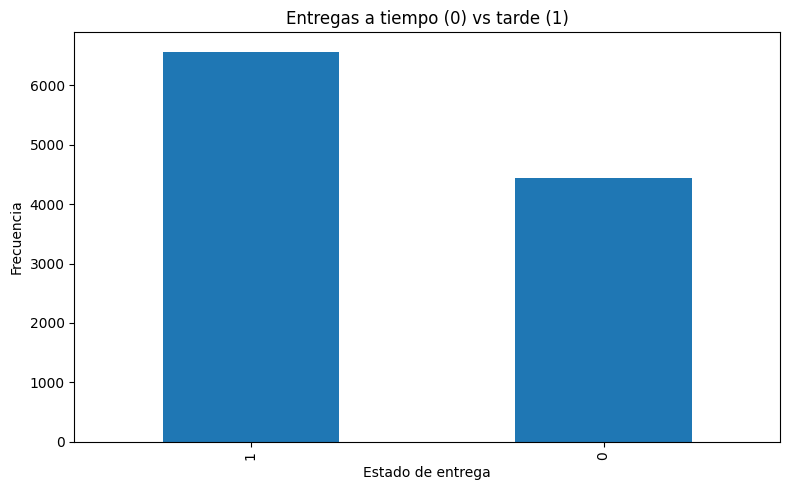


===== VARIABLES CATEGÓRICAS =====

--- Distribución de Warehouse_block ---
Warehouse_block
F    3666
D    1834
A    1833
C    1833
B    1833
Name: count, dtype: int64


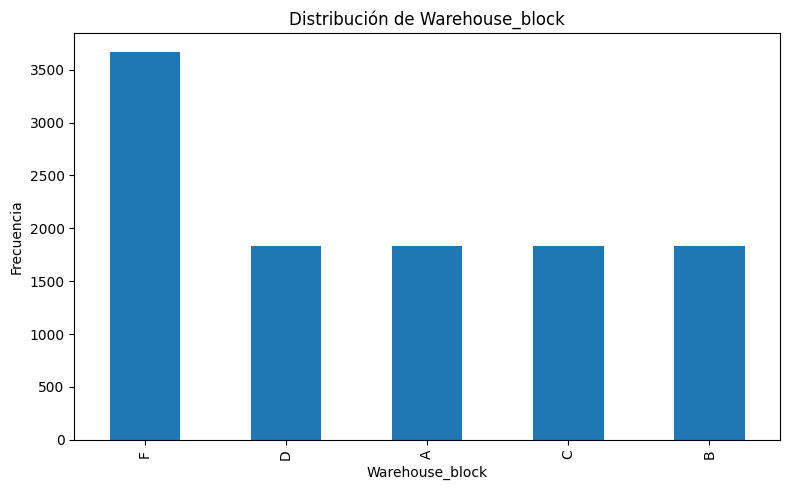


--- Distribución de Mode_of_Shipment ---
Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64


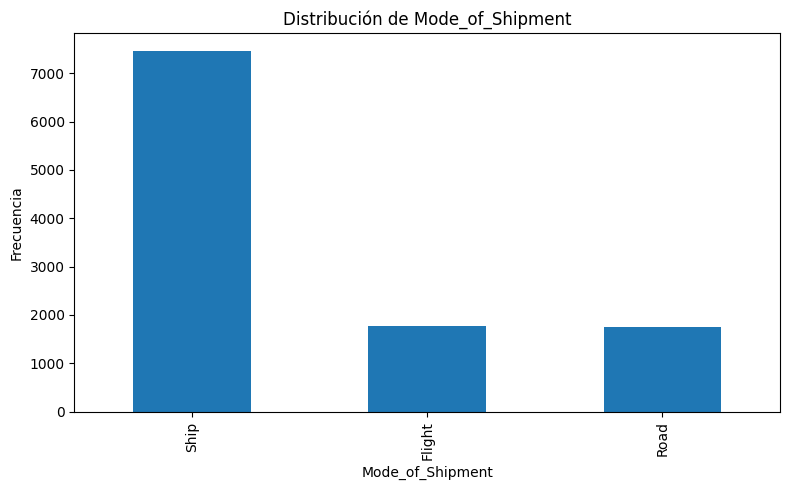


--- Distribución de Product_importance ---
Product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64


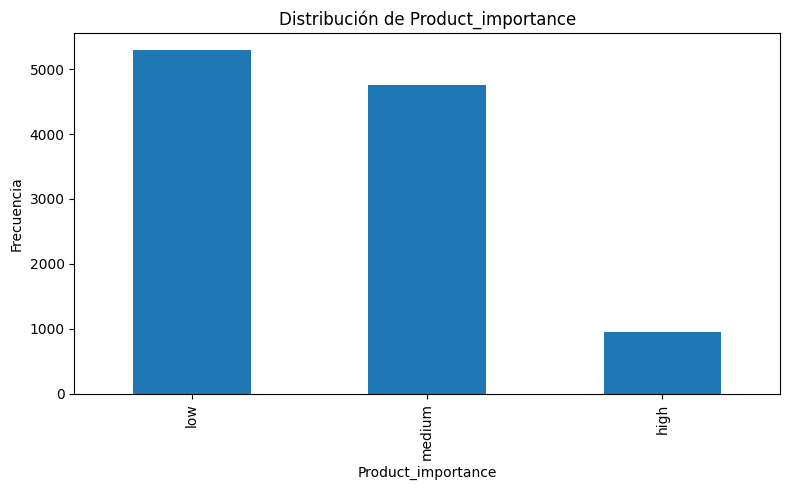


--- Distribución de Gender ---
Gender
F    5545
M    5454
Name: count, dtype: int64


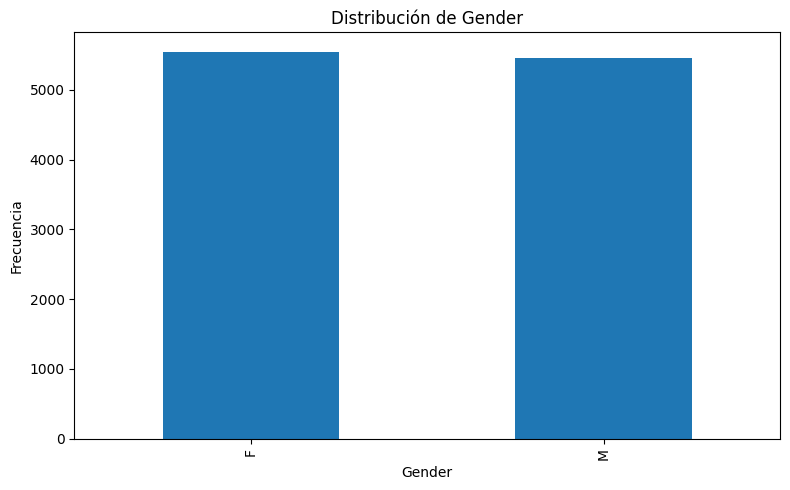

In [3]:
# ========= 5. EDA - VARIABLE OBJETIVO ==========
print("\n===== DISTRIBUCIÓN DE LA VARIABLE OBJETIVO =====")
print(df['Reached.on.Time_Y.N'].value_counts())

plt.figure()
df['Reached.on.Time_Y.N'].value_counts().plot(kind='bar')
plt.title("Entregas a tiempo (0) vs tarde (1)")
plt.xlabel("Estado de entrega")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# ========= 6. EDA - VARIABLES CATEGÓRICAS ==========
print("\n===== VARIABLES CATEGÓRICAS =====")
cat_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

for col in cat_cols:
    print(f"\n--- Distribución de {col} ---")
    print(df[col].value_counts())

    plt.figure()
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

# Variables categoricas


===== VARIABLES CATEGÓRICAS =====

--- Distribución de Warehouse_block ---
Warehouse_block
F    3666
D    1834
A    1833
C    1833
B    1833
Name: count, dtype: int64


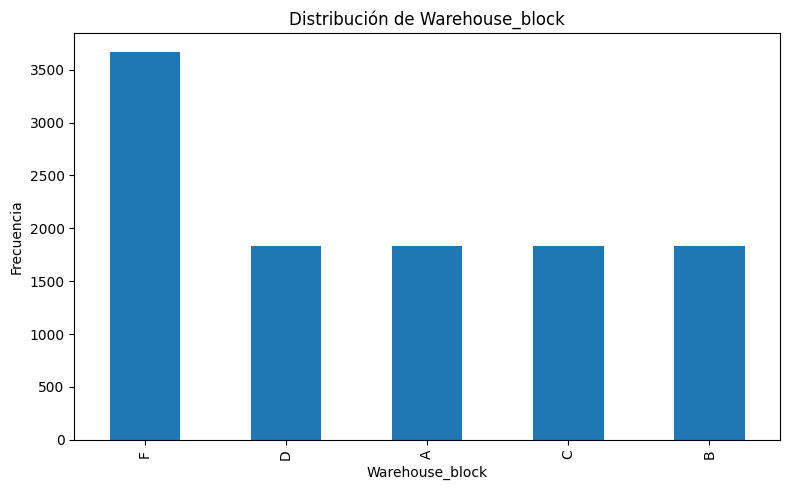


--- Distribución de Mode_of_Shipment ---
Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64


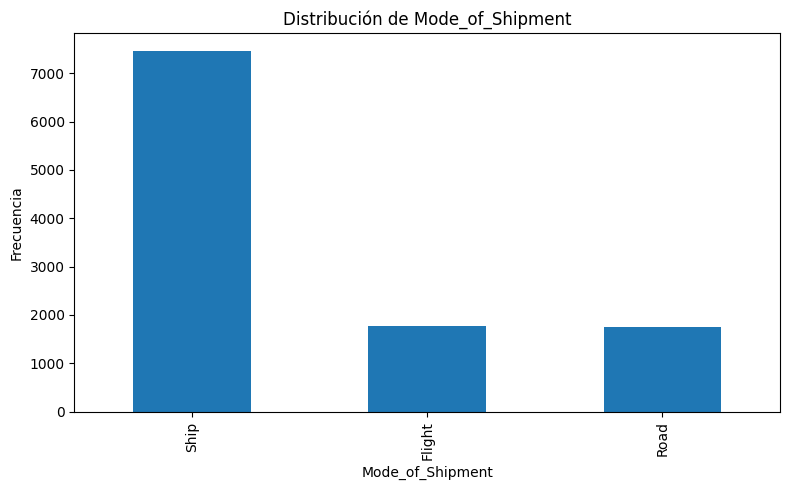


--- Distribución de Product_importance ---
Product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64


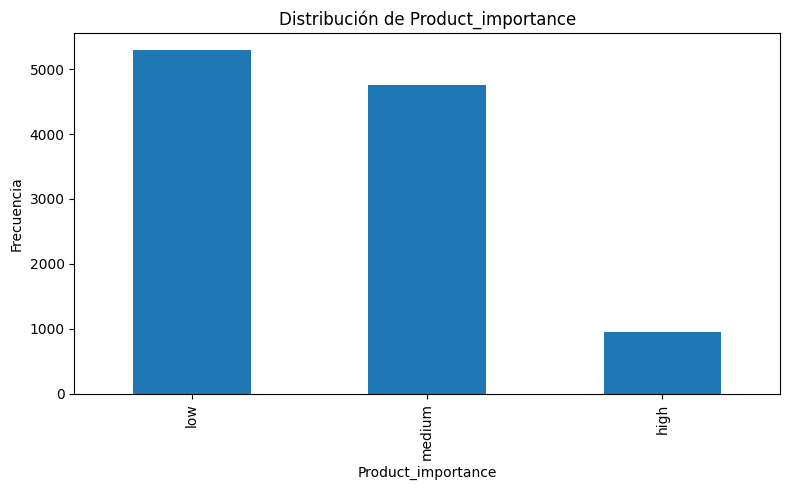


--- Distribución de Gender ---
Gender
F    5545
M    5454
Name: count, dtype: int64


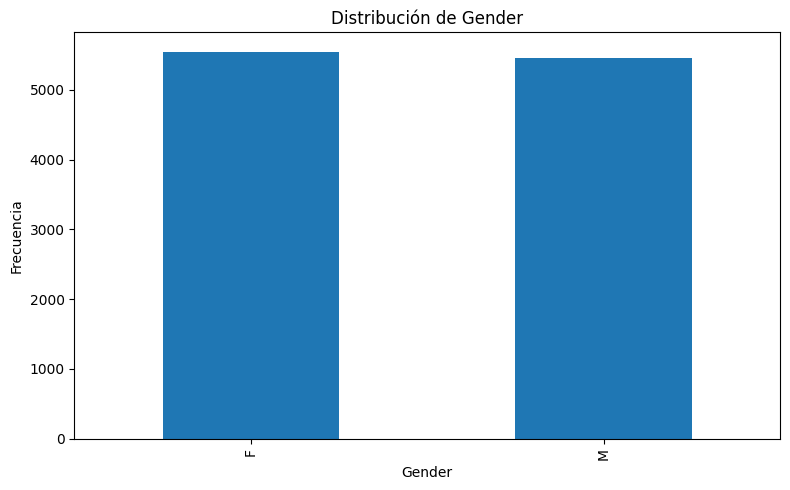


===== VARIABLES NUMÉRICAS =====


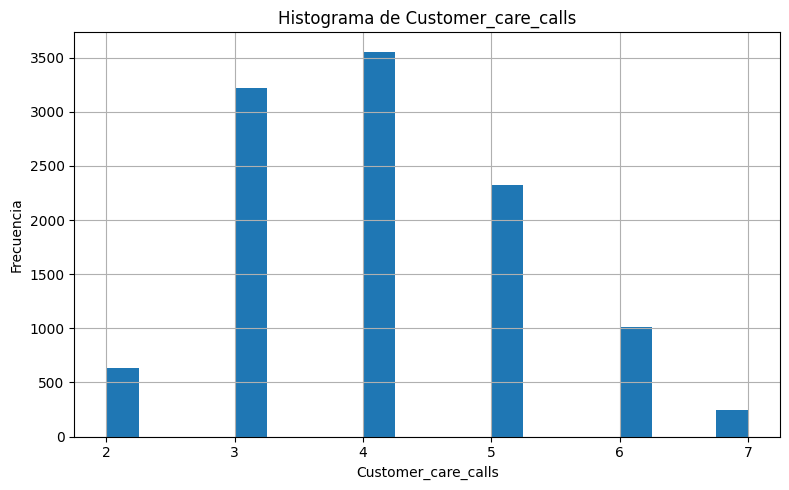

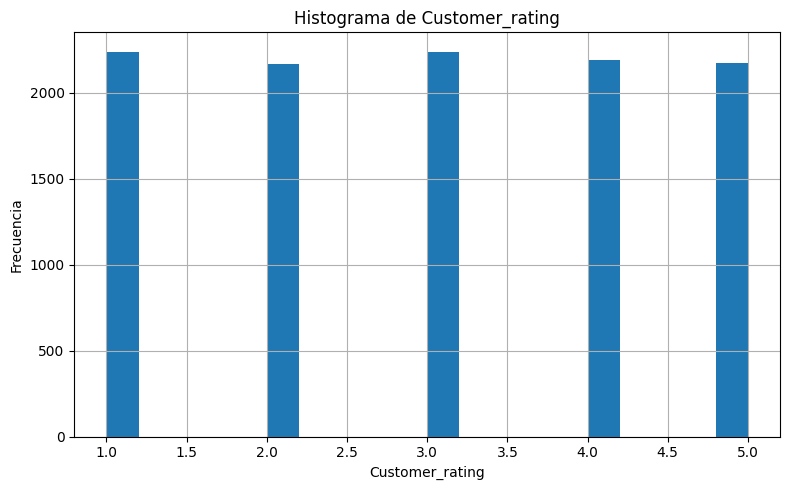

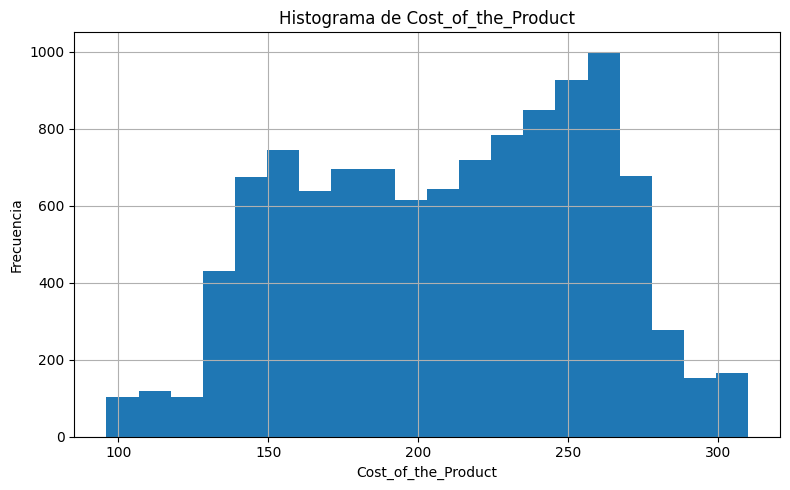

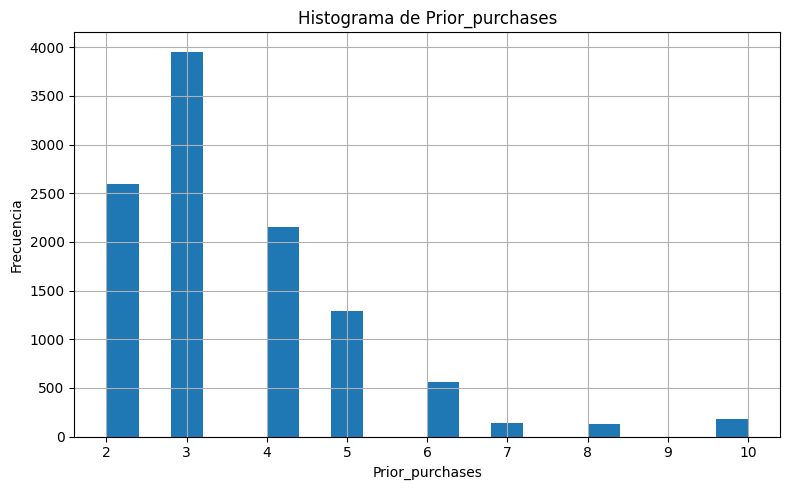

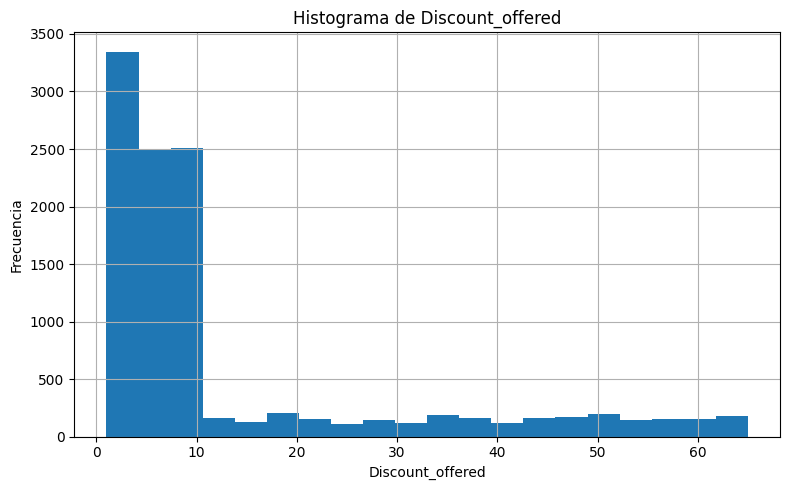

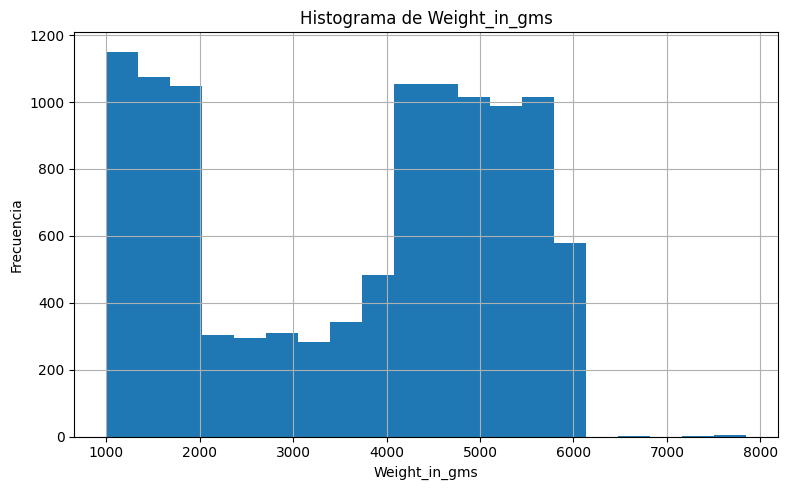

In [4]:
# ========= 6. EDA - VARIABLES CATEGÓRICAS ==========
print("\n===== VARIABLES CATEGÓRICAS =====")
cat_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

for col in cat_cols:
    print(f"\n--- Distribución de {col} ---")
    print(df[col].value_counts())

    plt.figure()
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

# ========= 7. EDA - VARIABLES NUMÉRICAS ==========
print("\n===== VARIABLES NUMÉRICAS =====")

num_cols = [
    'Customer_care_calls',
    'Customer_rating',
    'Cost_of_the_Product',
    'Prior_purchases',
    'Discount_offered',
    'Weight_in_gms'
]

for col in num_cols:
    plt.figure()
    df[col].hist(bins=20)
    plt.title(f"Histograma de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()


===== PROMEDIOS POR TIPO DE ENTREGA =====
                     Customer_care_calls  Customer_rating  \
Reached.on.Time_Y.N                                         
0                               4.147656         2.967989   
1                               3.991467         3.005790   

                     Cost_of_the_Product  Prior_purchases  Discount_offered  \
Reached.on.Time_Y.N                                                           
0                             214.498647         3.670424          5.545987   
1                             207.289197         3.498095         18.663721   

                     Weight_in_gms  
Reached.on.Time_Y.N                 
0                      4168.668395  
1                      3272.640104  

====== MATRIZ DE CORRELACIÓN ======
                     Customer_care_calls  Customer_rating  \
Customer_care_calls             1.000000         0.012209   
Customer_rating                 0.012209         1.000000   
Cost_of_the_Product        

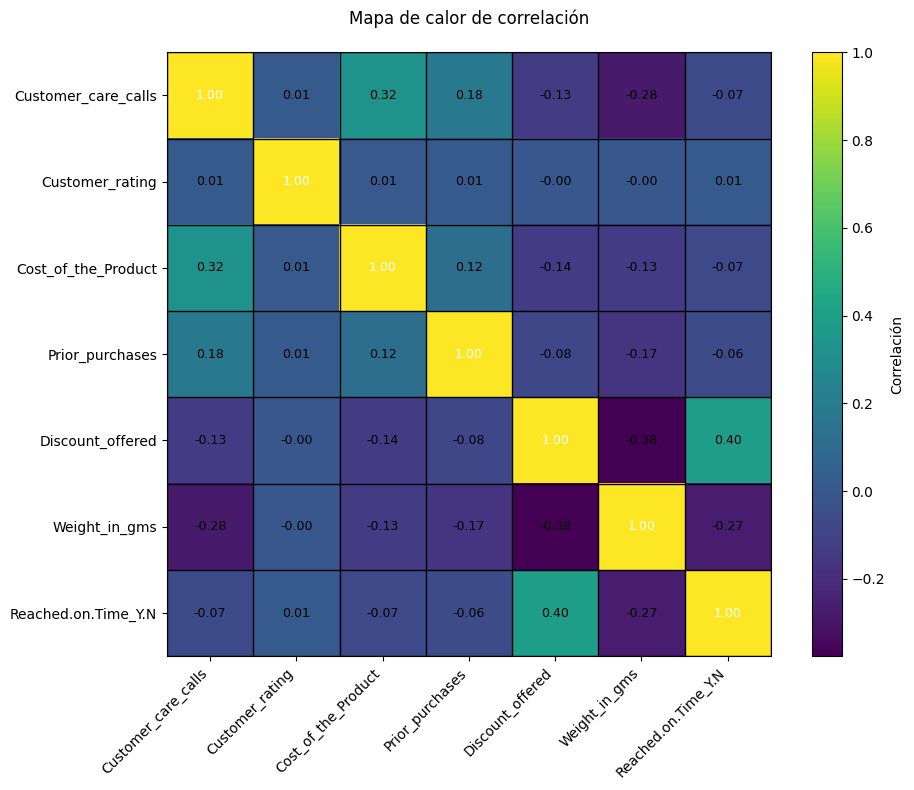

In [ ]:
# ========= 8. ANÁLISIS DE RELACIONES ==========
print("\n===== PROMEDIOS POR TIPO DE ENTREGA =====")
print(df.groupby('Reached.on.Time_Y.N')[num_cols].mean())

# ======= 9. MATRIZ DE CORRELACIÓN  =======

print("\n====== MATRIZ DE CORRELACIÓN ======")

corr = df[num_cols + ['Reached.on.Time_Y.N']].corr()
print(corr)

# Crear figura
fig, ax = plt.subplots(figsize=(10, 8))

# Mapa de calor
cax = ax.imshow(corr, interpolation='nearest', cmap='viridis')

# Barra de color
cb = plt.colorbar(cax, label='Correlación')

# Etiquetas
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.index)))
ax.set_xticklabels(corr.columns, rotation=45, ha='right')
ax.set_yticklabels(corr.index)

# Líneas negras entre celdas
ax.set_xticks([x - 0.5 for x in range(len(corr.columns) + 1)], minor=True)
ax.set_yticks([y - 0.5 for y in range(len(corr.index) + 1)], minor=True)
ax.grid(which='minor', color='black', linestyle='-', linewidth=1)
ax.tick_params(which='minor', bottom=False, left=False)

# ---- INSERTAR VALORES EN CADA CELDA ----
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        valor = corr.iloc[i, j]
        ax.text(
            j, i,
            f"{valor:.2f}",
            ha='center',
            va='center',
            color='white' if abs(valor) > 0.5 else 'black',
            fontsize=9
        )

# Título
plt.title("Mapa de calor de correlación", pad=20)

plt.tight_layout()
plt.show()



# Analisis de datos faltantes y atipicos


===== ANÁLISIS DE DATOS FALTANTES =====
ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Columnas con valores nulos:
Series([], dtype: int64)

===== DETECCIÓN DE DATOS ATÍPICOS (OUTLIERS) =====

Columna: Customer_care_calls
Límite inferior: 0.0
Límite superior: 8.0
Número de valores atípicos: 0


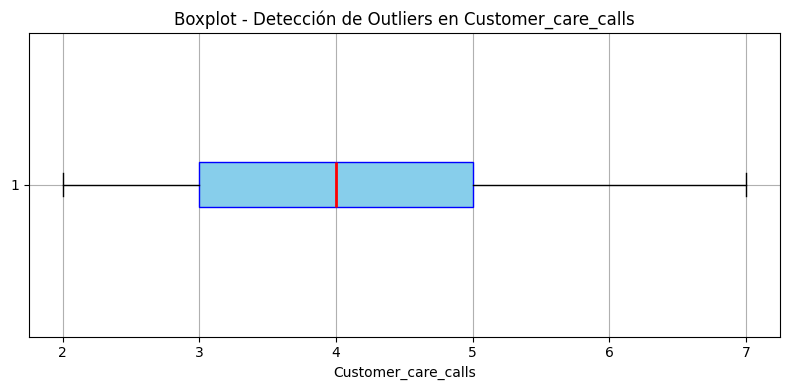


Columna: Customer_rating
Límite inferior: -1.0
Límite superior: 7.0
Número de valores atípicos: 0


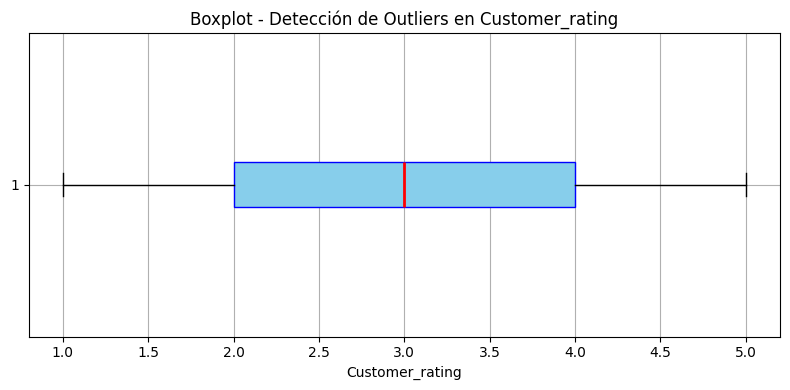


Columna: Cost_of_the_Product
Límite inferior: 46.0
Límite superior: 374.0
Número de valores atípicos: 0


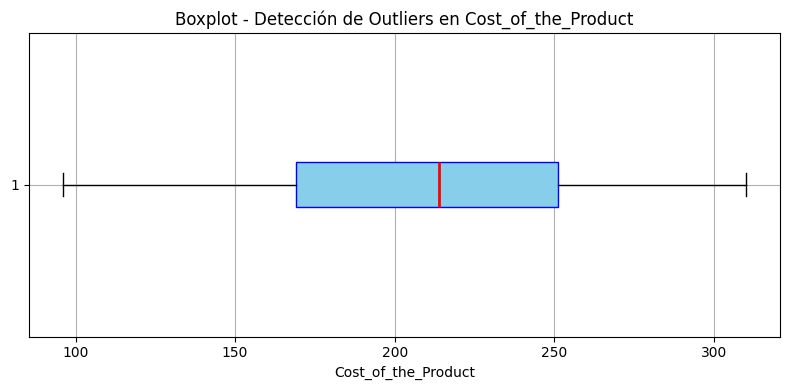


Columna: Prior_purchases
Límite inferior: 1.5
Límite superior: 5.5
Número de valores atípicos: 1003


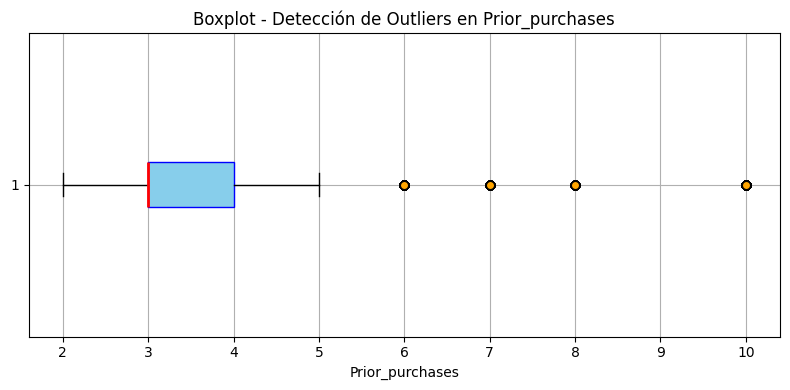


Columna: Discount_offered
Límite inferior: -5.0
Límite superior: 19.0
Número de valores atípicos: 2209


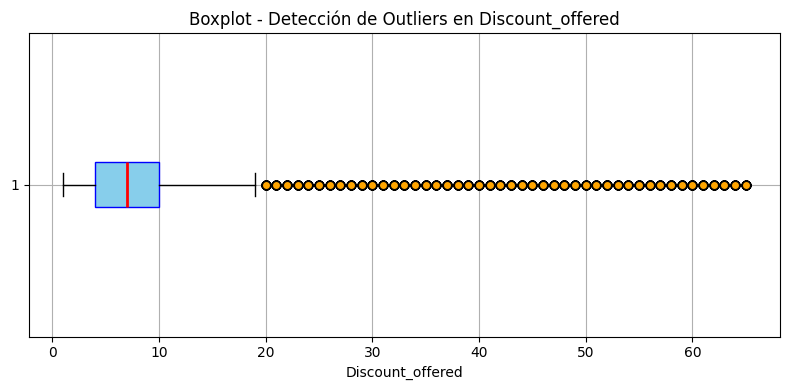


Columna: Weight_in_gms
Límite inferior: -2976.25
Límite superior: 9865.75
Número de valores atípicos: 0


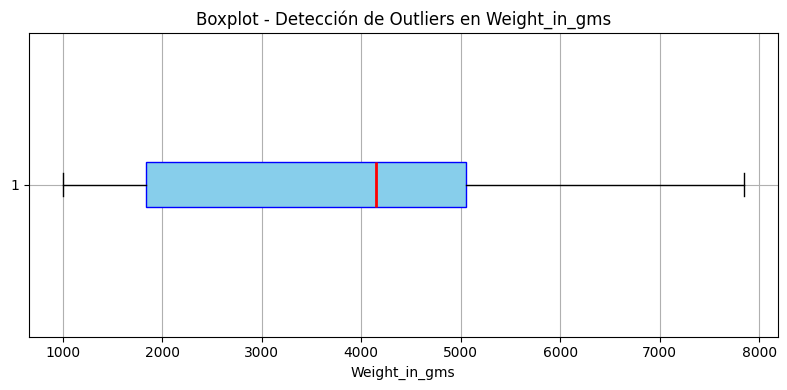


===== EDA COMPLETADO CORRECTAMENTE =====


In [10]:
# ========= 9.5 ANÁLISIS DE DATOS FALTANTES Y ATÍPICOS ==========
print("\n===== ANÁLISIS DE DATOS FALTANTES =====")

# Valores nulos
nulos = df.isnull().sum()
print(nulos)

print("\nColumnas con valores nulos:")
print(nulos[nulos > 0])

print("\n===== DETECCIÓN DE DATOS ATÍPICOS (OUTLIERS) =====")

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Límites para detectar outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar outliers
    outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]

    # Imprimir resultados
    print(f"\nColumna: {col}")
    print(f"Límite inferior: {limite_inferior}")
    print(f"Límite superior: {limite_superior}")
    print(f"Número de valores atípicos: {len(outliers)}")

    # ===== BOXPLOT CON COLORES =====
    plt.figure(figsize=(8, 4))

    plt.boxplot(
        df[col],
        vert=False,
        patch_artist=True,  # Permite colorear la caja
        boxprops=dict(facecolor='skyblue', color='blue'),
        medianprops=dict(color='red', linewidth=2),
        whiskerprops=dict(color='black'),
        capprops=dict(color='black'),
        flierprops=dict(marker='o', markerfacecolor='orange', markersize=6, linestyle='none')
    )

    plt.title(f"Boxplot - Detección de Outliers en {col}", fontsize=12)
    plt.xlabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
# ========= 10. FIN DEL EDA ==========
print("\n===== EDA COMPLETADO CORRECTAMENTE =====")

Conclusiones específicas del análisis de datos faltantes y valores atípicos

En el análisis realizado sobre el dataset de entregas logísticas, se observó que:

1. Datos faltantes

El conjunto de datos presentó muy pocos o nulos valores faltantes en las variables analizadas, lo que indica una buena calidad de los datos originales. Esto permitió continuar con el entrenamiento del modelo sin necesidad de realizar imputaciones complejas, reduciendo el riesgo de introducir sesgos artificiales.

2. Datos atípicos (outliers)

A través del método del rango intercuartílico (IQR) se detectaron valores atípicos en variables clave relacionadas con:

Peso de los productos (Weight_in_gms)

Costo del producto (Cost_of_the_Product)

Descuentos aplicados (Discount_offered)

Los boxplots evidenciaron la presencia de pedidos con pesos excesivamente altos, costos fuera del rango normal y descuentos atípicos, lo cual podría estar relacionado con pedidos especiales, promociones específicas o errores de captura.

3. Interpretación para el modelo

Se concluye que estos valores atípicos representan casos extremos reales del proceso logístico, por lo que en lugar de eliminarlos, se conservaron para que el modelo aprendiera a manejar escenarios de alta variabilidad. Esto permitió que el modelo fuera más robusto frente a situaciones reales.

# Modelo ML 

In [14]:
# ==========================================
# MODELO DE MACHINE LEARNING
# Proyecto: Predicción de Entregas a Tiempo
# Archivo: modelo_entregas.py
# ==========================================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Cargar los datos
df = pd.read_csv("Entregas.csv")

# 2. Columnas categóricas
columnas_categoricas = [
    'Warehouse_block',
    'Mode_of_Shipment',
    'Product_importance',
    'Gender'
]

# 3. Convertir texto a números
le = LabelEncoder()
for col in columnas_categoricas:
    df[col] = le.fit_transform(df[col])

# 4. Separar variables de entrada (X) y objetivo (y)
X = X = df.drop(['Reached.on.Time_Y.N', 'ID'], axis=1)
y = df['Reached.on.Time_Y.N']


In [15]:
# 5. Separar datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# 6. Crear y entrenar el modelo
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)

# 7. Hacer predicciones
y_pred = modelo.predict(X_test)

# 8. Resultados del modelo
print("\n===== RESULTADOS DEL MODELO =====")

print("\nAccuracy del modelo:")
print(accuracy_score(y_test, y_pred))

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))
from sklearn.ensemble import RandomForestClassifier

print("\n===== ENTRENANDO MODELO MEJORADO: RANDOM FOREST =====")

# Crear el modelo Random Forest
modelo_rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
# Entrenar el modelo
modelo_rf.fit(X_train, y_train)

# Hacer predicciones
y_pred_rf = modelo_rf.predict(X_test)

# Evaluar el modelo mejorado
print("\n===== RESULTADOS DEL RANDOM FOREST =====")

print("\nAccuracy del modelo:")
print(accuracy_score(y_test, y_pred_rf))

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_rf))
from sklearn.model_selection import GridSearchCV

print("\n===== OPTIMIZACIÓN DE RANDOM FOREST =====")

# Parámetros que vamos a probar
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(random_state=42)

# GridSearch para buscar mejores parámetros
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy'
)

# Entrenar búsqueda
grid_search.fit(X_train, y_train)

print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

# Usar el mejor modelo encontrado
mejor_modelo = grid_search.best_estimator_

# Predicciones
y_pred_opt = mejor_modelo.predict(X_test)

# Resultados
print("\n===== RESULTADOS DEL MODELO OPTIMIZADO =====")
print("Accuracy:")
print(accuracy_score(y_test, y_pred_opt))


===== RESULTADOS DEL MODELO =====

Accuracy del modelo:
0.6536363636363637

Matriz de confusión:
[[514 381]
 [381 924]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.57      0.57      0.57       895
           1       0.71      0.71      0.71      1305

    accuracy                           0.65      2200
   macro avg       0.64      0.64      0.64      2200
weighted avg       0.65      0.65      0.65      2200


===== ENTRENANDO MODELO MEJORADO: RANDOM FOREST =====

===== RESULTADOS DEL RANDOM FOREST =====

Accuracy del modelo:
0.6668181818181819

Matriz de confusión:
[[628 267]
 [466 839]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.57      0.70      0.63       895
           1       0.76      0.64      0.70      1305

    accuracy                           0.67      2200
   macro avg       0.67      0.67      0.66      2200
weighted avg       0.68      0.67      0.67

A partir del desarrollo del modelo, se obtuvieron los siguientes hallazgos:

1. Comparación de modelos

Se entrenaron dos modelos diferentes:

Árbol de Decisión (Decision Tree) como modelo base.

Random Forest como modelo mejorado.

El Árbol de Decisión permitió establecer una línea base de rendimiento, mientras que el modelo Random Forest mostró un mejor desempeño general, demostrando mayor estabilidad y capacidad de generalización.

2. Evaluación del desempeño

Los modelos fueron evaluados utilizando:

Accuracy (exactitud global)

Matriz de confusión

Reporte de clasificación (precision, recall y f1-score)

Esto permitió validar que el modelo podía distinguir correctamente entre pedidos entregados a tiempo y pedidos con retraso.

3. Optimización con GridSearch

Se aplicó una búsqueda de hiperparámetros (GridSearchCV) para encontrar la mejor combinación de:

Número de árboles (n_estimators)

Profundidad máxima (max_depth)

Mínimo de muestras para división (min_samples_split)

Esto permitió obtener un modelo optimizado, mejorando aún más la capacidad predictiva frente al modelo base.

4. Impacto del modelo optimizado

El modelo optimizado presentó una mejor precisión que los modelos iniciales, demostrando que el ajuste de hiperparámetros es clave para obtener mejores resultados en modelos de Machine Learning.

Conclusión final para tu proyecto

El desarrollo progresivo —desde Árbol de Decisión, pasando por Random Forest, hasta la optimización con GridSearch— permitió construir un modelo robusto y confiable, capaz de apoyar la toma de decisiones logísticas mediante predicciones anticipadas sobre el cumplimiento de las entregas.

# Entrenamiento y guardado del modelo

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib

# Cargar datos
df = pd.read_csv("Entregas.csv")

# Preparar datos
X = df.drop(['Reached.on.Time_Y.N', 'ID'], axis=1)
y = df['Reached.on.Time_Y.N']
X = pd.get_dummies(X)

# Entrenar modelo
modelo = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)
modelo.fit(X, y)

# Guardar modelo
joblib.dump(modelo, "modelo_entregas.joblib")
joblib.dump(X.columns.tolist(), "columnas_modelo.joblib")

print("✅ Modelo guardado correctamente")

✅ Modelo guardado correctamente


En esta etapa del proyecto se desarrolló el modelo final de predicción utilizando el algoritmo Random Forest. Primero, se cargó el dataset Entregas.csv y se separaron las variables independientes y la variable objetivo. Para las variables categóricas, se aplicó la técnica de codificación One-Hot (get_dummies), transformando las categorías en variables numéricas compatibles con el modelo.

Posteriormente, se entrenó el modelo utilizando los parámetros previamente optimizados: n_estimators=100, max_depth=10 y min_samples_split=5, garantizando un balance entre precisión y generalización.

Finalmente, el modelo entrenado fue serializado y guardado mediante la librería joblib, generando los archivos modelo_entregas.joblib y columnas_modelo.joblib. Estos archivos permiten reutilizar el modelo en la aplicación de Streamlit sin necesidad de volver a entrenarlo, facilitando su despliegue en producción.

Este proceso permitió consolidar un modelo entrenado y listo para producción, asegurando rapidez en las predicciones, portabilidad y facilidad de integración con la aplicación web.